In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from summarytools import dfSummary
from sklearn.preprocessing import LabelEncoder

C:\Users\RAHUL SHARMA\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
food_data = pd.read_csv("Train_Food.csv") 
test_data = pd.read_csv("Test_Food.csv")

In [4]:
food_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [6]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
food_data.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)
test_data.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)

In [8]:
# Replace string "NaN" with actual NaN values
food_data.replace("NaN", np.nan, regex=True, inplace=True)
food_data.dropna(inplace=True)
test_data.replace("NaN", np.nan, regex=True, inplace=True)
test_data.dropna(inplace=True)

In [9]:
from geopy.distance import geodesic
def calculate_distance(data):
    res_cords = (data["Restaurant_latitude"],data["Restaurant_longitude"])
    dil_cords = (data['Delivery_location_latitude'],data['Delivery_location_longitude'])
    return geodesic(res_cords,dil_cords).kilometers
food_data["Distance"] = food_data.apply(calculate_distance,axis = 1)
test_data["Distance"] = test_data.apply(calculate_distance,axis = 1)

In [10]:
food_data["Delivery_person_Age"] = food_data["Delivery_person_Age"].astype("float")
food_data["Delivery_person_Ratings"] = food_data["Delivery_person_Ratings"].astype("float")
food_data["Distance"] = food_data["Distance"].astype("float")
food_data["multiple_deliveries"] = food_data["multiple_deliveries"].astype("float")

test_data["Delivery_person_Age"] = test_data["Delivery_person_Age"].astype("float")
test_data["Delivery_person_Ratings"] = test_data["Delivery_person_Ratings"].astype("float")
test_data["Distance"] = test_data["Distance"].astype("float")
test_data["multiple_deliveries"] = test_data["multiple_deliveries"].astype("float")

In [11]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41368 non-null  float64
 1   Delivery_person_Ratings      41368 non-null  float64
 2   Restaurant_latitude          41368 non-null  float64
 3   Restaurant_longitude         41368 non-null  float64
 4   Delivery_location_latitude   41368 non-null  float64
 5   Delivery_location_longitude  41368 non-null  float64
 6   Order_Date                   41368 non-null  object 
 7   Time_Orderd                  41368 non-null  object 
 8   Time_Order_picked            41368 non-null  object 
 9   Weatherconditions            41368 non-null  object 
 10  Road_traffic_density         41368 non-null  object 
 11  Vehicle_condition            41368 non-null  int64  
 12  Type_of_order                41368 non-null  object 
 13  Type_of_vehicle 

In [12]:
food_data['Time_taken(min)'] = food_data['Time_taken(min)'].astype(str)
# Extract digits from the string and convert to float
food_data['Time_taken(min)'] = food_data['Time_taken(min)'].str.extract('(\d+)').astype(float)

food_data["Weatherconditions"] = food_data["Weatherconditions"].str.replace("conditions","")
test_data["Weatherconditions"] = test_data["Weatherconditions"].str.replace("conditions","")

In [13]:
food_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.020737
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,20.143737
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,1.549693
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.774497
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,6.197898


In [14]:
food_data["Road_traffic_density"].value_counts()

Low        13981
Jam        13159
Medium     10125
High        4103
Name: Road_traffic_density, dtype: int64

In [15]:
food_data["Vehicle_condition"].value_counts()

0    13925
2    13755
1    13688
Name: Vehicle_condition, dtype: int64

In [16]:
food_data["Type_of_order"].value_counts()

Meal       10421
Snack      10419
Drinks     10302
Buffet     10226
Name: Type_of_order, dtype: int64

In [17]:
food_data["Type_of_vehicle"].value_counts()

motorcycle           24300
scooter              13723
electric_scooter      3345
Name: Type_of_vehicle, dtype: int64

In [18]:
food_data["multiple_deliveries"].value_counts()

1.0    26176
0.0    12974
2.0     1881
3.0      337
Name: multiple_deliveries, dtype: int64

In [19]:
food_data["Festival"].value_counts()

No      40535
Yes       833
Name: Festival, dtype: int64

In [20]:
food_data["City"].value_counts()

Metropolitian     31822
Urban              9394
Semi-Urban          152
Name: City, dtype: int64

In [21]:
food_data["Weatherconditions"].value_counts()

 Fog           7116
 Stormy        6997
 Cloudy        6950
 Sandstorms    6852
 Windy         6839
 Sunny         6614
Name: Weatherconditions, dtype: int64

In [22]:
food_data.shape

(41368, 19)

In [23]:
# food_data.sample(50)

In [24]:
food_data["Time_Orderd"] = pd.to_datetime(food_data.Time_Orderd)
food_data["Time_Order_picked"] = pd.to_datetime(food_data.Time_Order_picked)
test_data["Time_Orderd"] = pd.to_datetime(test_data.Time_Orderd)
test_data["Time_Order_picked"] = pd.to_datetime(test_data.Time_Order_picked)

food_data['Order_Date']=pd.to_datetime(food_data['Order_Date'])
test_data["Order_Date"] = pd.to_datetime(test_data.Order_Date)

C:\Users\RAHUL SHARMA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\RAHUL SHARMA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\RAHUL SHARMA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\RAHUL SHARMA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-03-2022' in DD/MM/YYYY form

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 1 to 11398
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          10291 non-null  float64       
 1   Delivery_person_Ratings      10291 non-null  float64       
 2   Restaurant_latitude          10291 non-null  float64       
 3   Restaurant_longitude         10291 non-null  float64       
 4   Delivery_location_latitude   10291 non-null  float64       
 5   Delivery_location_longitude  10291 non-null  float64       
 6   Order_Date                   10291 non-null  datetime64[ns]
 7   Time_Orderd                  10291 non-null  datetime64[ns]
 8   Time_Order_picked            10291 non-null  datetime64[ns]
 9   Weatherconditions            10291 non-null  object        
 10  Road_traffic_density         10291 non-null  object        
 11  Vehicle_condition            10291 non-nu

In [26]:
food_data["year"] = food_data['Order_Date'].dt.year
food_data["month"] = food_data['Order_Date'].dt.month
food_data['day'] = food_data['Order_Date'].dt.day
test_data["year"] = food_data['Order_Date'].dt.year
test_data["month"] = food_data['Order_Date'].dt.month
test_data['day'] = food_data['Order_Date'].dt.day

food_data["time_ordered_hour"] = food_data['Time_Orderd'].dt.hour
food_data["time_ordered_minute"] = food_data['Time_Orderd'].dt.minute
test_data["time_ordered_hour"] = test_data['Time_Orderd'].dt.hour
test_data["time_ordered_minute"] = test_data['Time_Orderd'].dt.minute

food_data['time_order_picked_hour'] = food_data['Time_Order_picked'].dt.hour
food_data['time_order_picked_minute'] = food_data['Time_Order_picked'].dt.minute
test_data['time_order_picked_hour'] = test_data['Time_Order_picked'].dt.hour
test_data['time_order_picked_minute'] = test_data['Time_Order_picked'].dt.minute

In [27]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          41368 non-null  float64       
 1   Delivery_person_Ratings      41368 non-null  float64       
 2   Restaurant_latitude          41368 non-null  float64       
 3   Restaurant_longitude         41368 non-null  float64       
 4   Delivery_location_latitude   41368 non-null  float64       
 5   Delivery_location_longitude  41368 non-null  float64       
 6   Order_Date                   41368 non-null  datetime64[ns]
 7   Time_Orderd                  41368 non-null  datetime64[ns]
 8   Time_Order_picked            41368 non-null  datetime64[ns]
 9   Weatherconditions            41368 non-null  object        
 10  Road_traffic_density         41368 non-null  object        
 11  Vehicle_condition            41368 non-nu

In [28]:
food_data.drop(["Time_Orderd","Time_Order_picked","Order_Date","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)
test_data.drop(["Time_Orderd","Time_Order_picked","Order_Date","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)

In [29]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delivery_person_Age       41368 non-null  float64
 1   Delivery_person_Ratings   41368 non-null  float64
 2   Weatherconditions         41368 non-null  object 
 3   Road_traffic_density      41368 non-null  object 
 4   Vehicle_condition         41368 non-null  int64  
 5   Type_of_order             41368 non-null  object 
 6   Type_of_vehicle           41368 non-null  object 
 7   multiple_deliveries       41368 non-null  float64
 8   Festival                  41368 non-null  object 
 9   City                      41368 non-null  object 
 10  Time_taken(min)           41368 non-null  float64
 11  Distance                  41368 non-null  float64
 12  year                      41368 non-null  int64  
 13  month                     41368 non-null  int64  
 14  day   

array([[<AxesSubplot:title={'center':'Delivery_person_Age'}>,
        <AxesSubplot:title={'center':'Delivery_person_Ratings'}>,
        <AxesSubplot:title={'center':'Vehicle_condition'}>,
        <AxesSubplot:title={'center':'multiple_deliveries'}>],
       [<AxesSubplot:title={'center':'Time_taken(min)'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'time_ordered_hour'}>,
        <AxesSubplot:title={'center':'time_ordered_minute'}>,
        <AxesSubplot:title={'center':'time_order_picked_hour'}>],
       [<AxesSubplot:title={'center':'time_order_picked_minute'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

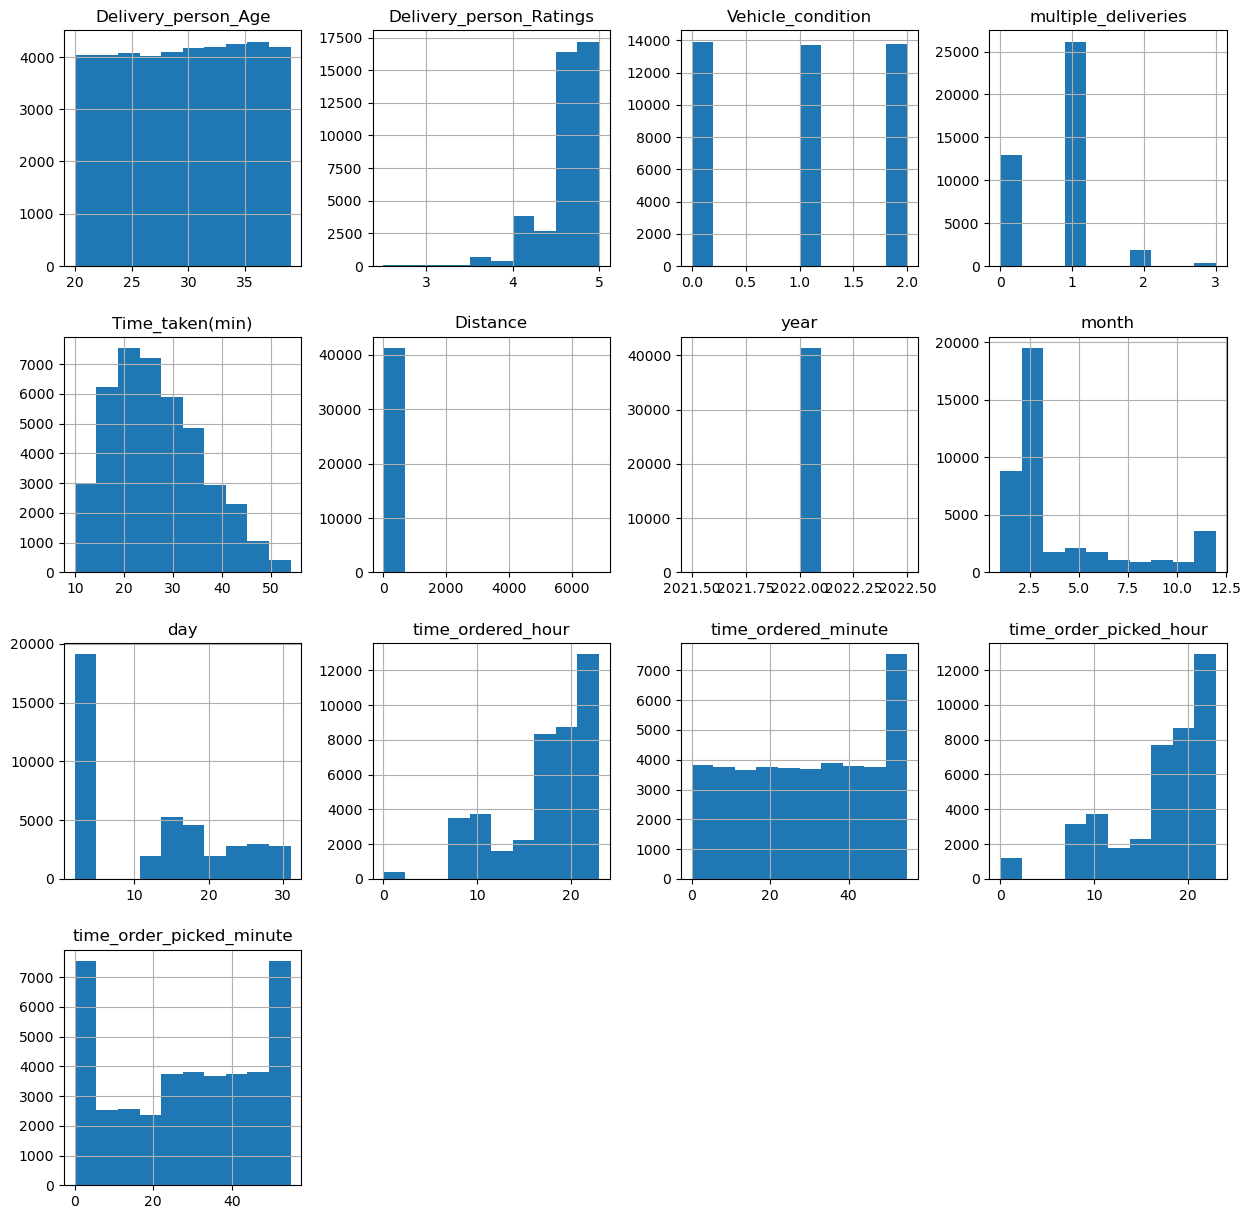

In [30]:
food_data.hist(figsize=(15,15))

In [31]:
num_list = [i for i in food_data.select_dtypes(["int64","float64"])]
cat_list = [ i for i in food_data.select_dtypes("object")]
num_list_test = [i for i in test_data.select_dtypes(["int64","float64"])]
cat_list_test = [ i for i in test_data.select_dtypes("object")]

In [32]:
cat_list

['Weatherconditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [33]:
food_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,year,month,day,time_ordered_hour,time_ordered_minute,time_order_picked_hour,time_order_picked_minute
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.020737,2022,3,19,11,30,11,45
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,20.143737,2022,3,25,19,45,19,50
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,1.549693,2022,3,19,8,30,8,45
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.774497,2022,5,4,18,0,18,10
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,6.197898,2022,3,26,13,30,13,45


In [34]:

label_mapping = {}

# Apply label encoding to each categorical column
for col in cat_list:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    
    # Fit and transform the column, and store the mapping
    food_data[col] = label_encoder.fit_transform(food_data[col])
    
    # Store the mapping in the dictionary
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping for each categorical column
for col, mapping in label_mapping.items():
    print("Mapping for column '{}':".format(col))
    print(mapping)
    print()

Mapping for column 'Weatherconditions':
{' Cloudy': 0, ' Fog': 1, ' Sandstorms': 2, ' Stormy': 3, ' Sunny': 4, ' Windy': 5}

Mapping for column 'Road_traffic_density':
{'High ': 0, 'Jam ': 1, 'Low ': 2, 'Medium ': 3}

Mapping for column 'Type_of_order':
{'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}

Mapping for column 'Type_of_vehicle':
{'electric_scooter ': 0, 'motorcycle ': 1, 'scooter ': 2}

Mapping for column 'Festival':
{'No ': 0, 'Yes ': 1}

Mapping for column 'City':
{'Metropolitian ': 0, 'Semi-Urban ': 1, 'Urban ': 2}



In [35]:
label_mapping_test = {}

# Apply label encoding to each categorical column
for col in cat_list_test:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    
    # Fit and transform the column, and store the mapping
    test_data[col] = label_encoder.fit_transform(test_data[col])
    
    # Store the mapping in the dictionary
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping for each categorical column
for col, mapping in label_mapping.items():
    print("Mapping for column '{}':".format(col))
    print(mapping)
    print()

Mapping for column 'Weatherconditions':
{' Cloudy': 0, ' Fog': 1, ' Sandstorms': 2, ' Stormy': 3, ' Sunny': 4, ' Windy': 5}

Mapping for column 'Road_traffic_density':
{'High ': 0, 'Jam ': 1, 'Low ': 2, 'Medium ': 3}

Mapping for column 'Type_of_order':
{'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}

Mapping for column 'Type_of_vehicle':
{'electric_scooter ': 0, 'motorcycle ': 1, 'scooter ': 2}

Mapping for column 'Festival':
{'No ': 0, 'Yes ': 1}

Mapping for column 'City':
{'Metropolitian ': 0, 'Semi-Urban ': 1, 'Urban ': 2}



In [36]:
food_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,year,month,day,time_ordered_hour,time_ordered_minute,time_order_picked_hour,time_order_picked_minute
0,37.0,4.9,4,0,2,3,1,0.0,0,2,24.0,3.020737,2022,3,19,11,30,11,45
1,34.0,4.5,3,1,2,3,2,1.0,0,0,33.0,20.143737,2022,3,25,19,45,19,50
2,23.0,4.4,2,2,0,1,1,1.0,0,2,26.0,1.549693,2022,3,19,8,30,8,45
3,38.0,4.7,4,3,0,0,1,1.0,0,0,21.0,7.774497,2022,5,4,18,0,18,10
4,32.0,4.6,0,0,1,3,2,1.0,0,0,30.0,6.197898,2022,3,26,13,30,13,45


In [37]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delivery_person_Age       41368 non-null  float64
 1   Delivery_person_Ratings   41368 non-null  float64
 2   Weatherconditions         41368 non-null  int32  
 3   Road_traffic_density      41368 non-null  int32  
 4   Vehicle_condition         41368 non-null  int64  
 5   Type_of_order             41368 non-null  int32  
 6   Type_of_vehicle           41368 non-null  int32  
 7   multiple_deliveries       41368 non-null  float64
 8   Festival                  41368 non-null  int32  
 9   City                      41368 non-null  int32  
 10  Time_taken(min)           41368 non-null  float64
 11  Distance                  41368 non-null  float64
 12  year                      41368 non-null  int64  
 13  month                     41368 non-null  int64  
 14  day   

<AxesSubplot:>

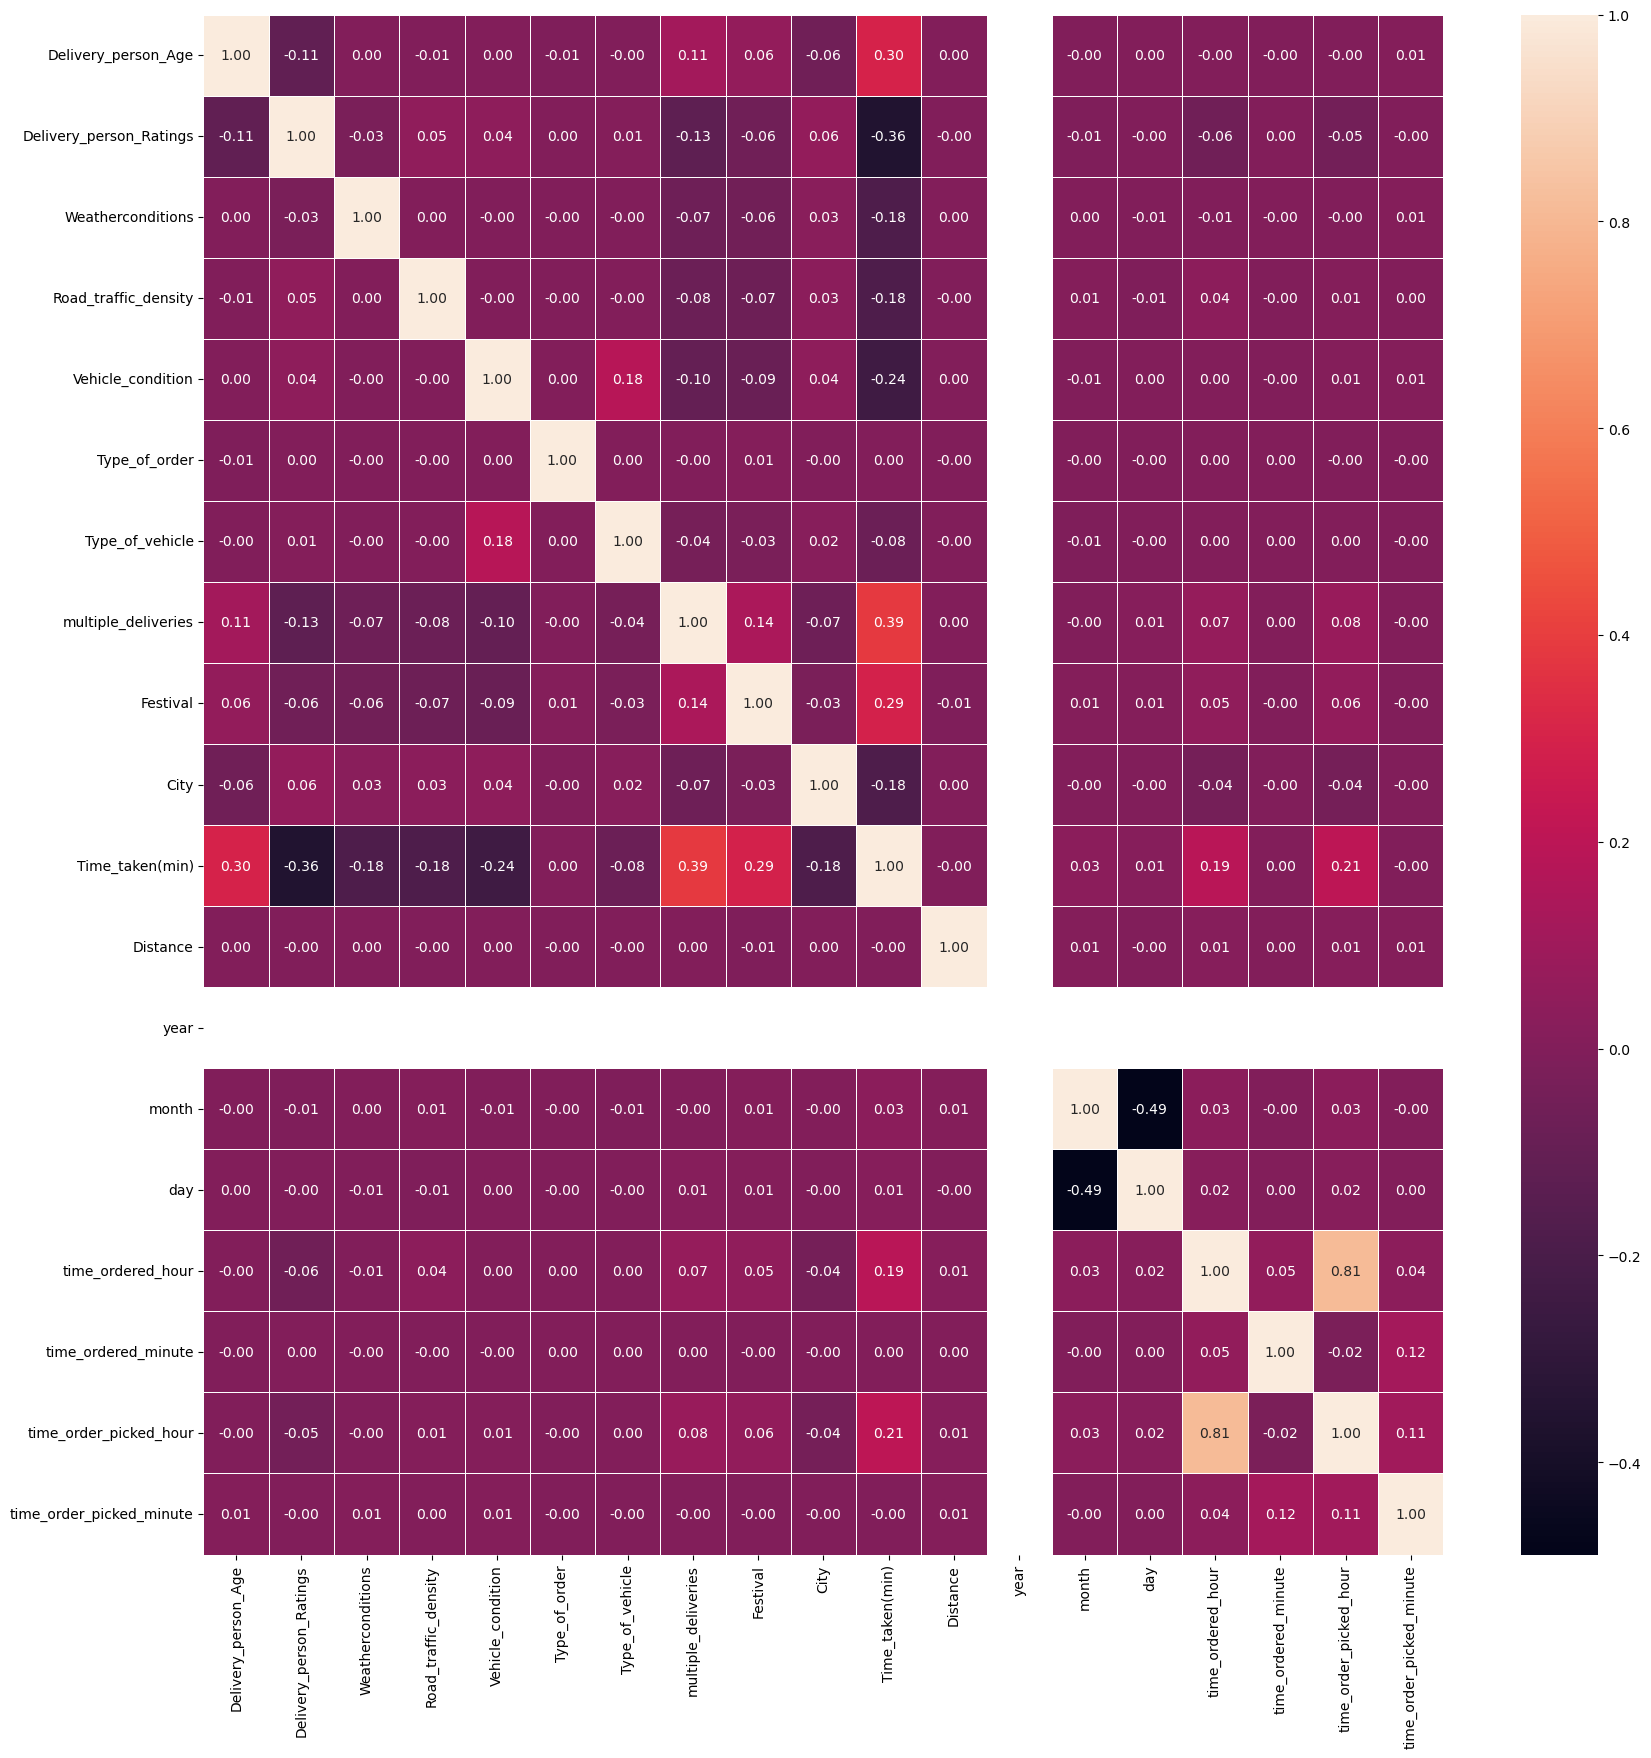

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(food_data.corr(),annot=True,linewidths=0.6,fmt=".2f")

In [39]:
food_data.corr()["Time_taken(min)"].sort_values(ascending=False)

Time_taken(min)             1.000000
multiple_deliveries         0.385257
Delivery_person_Age         0.297270
Festival                    0.291264
time_order_picked_hour      0.205809
time_ordered_hour           0.187347
month                       0.028535
day                         0.014385
time_ordered_minute         0.004377
Type_of_order               0.002319
Distance                   -0.001057
time_order_picked_minute   -0.001138
Type_of_vehicle            -0.079664
Weatherconditions          -0.182155
City                       -0.183254
Road_traffic_density       -0.184969
Vehicle_condition          -0.241702
Delivery_person_Ratings    -0.359866
year                             NaN
Name: Time_taken(min), dtype: float64

In [40]:
# food_data.drop(["time_ordered_minute","time_order_picked_minute","Type_of_order","day","month","","","","",""])

In [41]:
X = food_data.drop("Time_taken(min)",axis=1)
y = food_data["Time_taken(min)"]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

In [43]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,year,month,day,time_ordered_hour,time_ordered_minute,time_order_picked_hour,time_order_picked_minute
42046,35.0,3.8,3,1,2,1,2,1.0,0,0,10.625001,2022,3,25,20,15,20,20
41255,24.0,4.8,5,2,0,3,1,1.0,0,2,19.026636,2022,2,18,22,45,23,0
16851,21.0,4.4,5,1,0,0,1,1.0,0,0,13.961628,2022,4,4,19,25,19,40
41229,25.0,4.6,3,2,2,2,0,1.0,0,0,10.843722,2022,10,3,22,35,22,45
1991,33.0,3.8,0,2,1,0,2,1.0,0,0,16.796130,2022,6,4,23,35,23,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22773,35.0,5.0,2,2,0,0,1,0.0,0,0,17.063829,2022,6,4,22,55,23,5
35345,26.0,5.0,2,0,1,3,2,1.0,0,2,6.276139,2022,2,13,14,10,14,25
33486,30.0,4.2,0,2,2,1,1,2.0,0,0,16.612641,2022,6,4,22,55,23,0
23315,22.0,4.7,1,1,1,2,2,1.0,0,0,17.130333,2022,2,16,19,30,19,35


In [44]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [45]:
from xgboost import XGBRegressor

In [46]:
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
# xgb?

In [48]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators': [100, 200, 300,400,500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.05, 0.1, 0.2,0.3,0.4,0.5],
#     'objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:pseudohubererror']}
# grid_search = GridSearchCV(estimator=xgb,param_grid=parameters,scoring='r2', cv = 5, n_jobs = -1)
# grid_search.fit(X_train,y_train)
# best_r2 = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best r2 : {:.2f} %".format(best_r2*100))
# print("Best Parameters : ", best_parameters)

In [49]:
xgb_new = XGBRegressor(learning_rate = 0.05 , max_depth = 7, n_estimators = 200, objective = "reg:squarederror").fit(X_train,y_train)

In [50]:
y_pred1 = xgb_new.predict(X_test)

In [51]:
r3 = r2_score(y_test,y_pred1)
r3

0.8322328594562669

In [52]:
result_df2 = pd.DataFrame({'Actual': [round(i) for i in y_test], 'Predicted': [round(pred) for pred in y_pred1]})

In [53]:
result_df2.sample(50)

,Actual,Predicted
2066,19,18
1598,27,31
839,41,37
721,36,39
372,25,29
1752,25,25
776,30,27
541,38,35
1367,23,22
1272,28,26


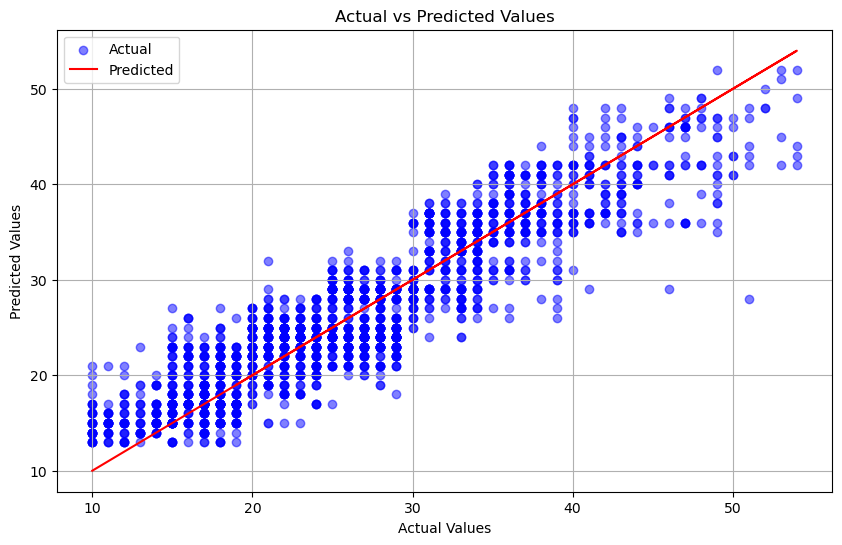

In [54]:
import matplotlib.pyplot as plt

# Assuming result_df is the DataFrame containing actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df2['Actual'], result_df2['Predicted'], color='blue', alpha=0.5)
plt.plot(result_df2['Actual'], result_df2['Actual'], color='red')  # Plot the diagonal line representing perfect predictions
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(result_df2)
plt.grid(True)
plt.show()


In [55]:
column_names = test_data.columns

# Apply feature scaling to the entire test data
scaled_values = ms.transform(test_data)

# Create a new DataFrame with the scaled values and original column names
scaled_test_data = pd.DataFrame(scaled_values, columns=column_names, index=test_data.index)

In [56]:
scaled_test_data

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,year,month,day,time_ordered_hour,time_ordered_minute,time_order_picked_hour,time_order_picked_minute
1,0.421053,0.84,1.0,0.333333,0.0,1.000000,0.5,0.333333,0.0,0.0,0.002274,0.0,0.181818,0.793103,0.869565,0.545455,0.869565,0.636364
2,0.157895,0.80,0.6,0.333333,0.0,0.333333,0.5,0.333333,0.0,0.0,0.001741,0.0,0.181818,0.586207,0.826087,0.636364,0.826087,0.818182
3,0.052632,0.92,0.2,1.000000,0.5,0.666667,1.0,0.333333,0.0,0.0,0.001742,0.0,0.363636,0.068966,0.739130,0.272727,0.739130,0.363636
4,0.578947,0.84,0.8,1.000000,1.0,0.333333,1.0,0.333333,0.0,0.0,0.002274,0.0,0.181818,0.827586,0.782609,0.454545,0.782609,0.727273
5,0.315789,0.88,0.2,0.666667,0.0,0.333333,0.5,0.333333,0.0,0.0,0.000011,0.0,0.909091,0.034483,0.391304,0.818182,0.391304,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,0.578947,0.88,1.0,0.666667,1.0,1.000000,1.0,0.333333,0.0,0.0,0.000015,0.0,0.363636,0.068966,0.478261,0.000000,0.478261,0.181818
11394,0.789474,0.84,0.8,0.333333,0.5,1.000000,1.0,0.333333,0.0,0.0,0.002176,0.0,0.181818,0.965517,0.913043,0.636364,0.913043,0.818182
11395,0.684211,0.96,0.4,0.000000,0.5,0.333333,1.0,0.333333,0.0,0.0,0.000004,0.0,0.181818,0.827586,0.478261,0.727273,0.478261,0.818182
11397,0.368421,0.88,0.4,1.000000,0.0,0.666667,0.5,0.000000,0.0,0.0,0.002656,0.0,0.000000,0.068966,0.782609,0.636364,0.782609,0.727273


In [57]:
test_data["Time_taken(min)"] = xgb_new.predict(scaled_test_data)

In [58]:
test_data

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,year,month,day,time_ordered_hour,time_ordered_minute,time_order_picked_hour,time_order_picked_minute,Time_taken(min)
1,28.0,4.6,5,1,0,3,1,1.0,0,0,17.042985,2022.0,3.0,25.0,20,30,20,35,30.317709
2,23.0,4.5,3,1,0,1,1,1.0,0,0,13.390474,2022.0,3.0,19.0,19,35,19,45,29.610493
3,21.0,4.8,1,3,1,2,2,1.0,0,0,13.397932,2022.0,5.0,4.0,17,15,17,20,30.989939
4,31.0,4.6,4,3,2,1,2,1.0,0,0,17.042634,2022.0,3.0,26.0,18,25,18,40,22.551304
5,26.0,4.7,1,2,0,1,1,1.0,0,0,1.541060,2022.0,11.0,3.0,9,45,9,55,19.774311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,31.0,4.7,5,2,2,3,2,1.0,0,0,1.569035,2022.0,5.0,4.0,11,0,11,10,24.738762
11394,35.0,4.6,4,1,1,3,2,1.0,0,0,16.365894,2022.0,3.0,30.0,21,35,21,45,22.691515
11395,33.0,4.9,2,0,1,1,2,1.0,0,0,1.488108,2022.0,3.0,26.0,11,40,11,45,29.851631
11397,27.0,4.7,2,3,0,2,1,0.0,0,0,19.658584,2022.0,1.0,4.0,18,35,18,40,26.746107
